In [1]:
import sys
sys.path.append('../')
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from utility.file_utility import FileUtility
#from utility.visualization_utility import plot_scatter
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline 

Populating the interactive namespace from numpy and matplotlib


In [20]:
def plot_scatter(ax, X, Y, x_label, y_label, title,legend_hide=True, legend_loc=4, label_dict=False, legend_size=7, legend_col=1, color_schemes_idx=1):
    
    global color_schemes
    
    target=list(set(Y))
    target.sort()
    color_idx=[target.index(x) for x in Y]
    color_list=color_schemes[color_schemes_idx]
  
    for current_color in range(len(target)):
        color=color_list
        current_idxs=[idx for idx,v in enumerate(color_idx) if v==current_color]
        if label_dict:
            ax.scatter(X[current_idxs, 0], X[current_idxs, 1], c=color[current_color], label=label_dict[target[current_color]], cmap='viridis', alpha=0.4, edgecolors=None)
        else:
            ax.scatter(X[current_idxs, 0], X[current_idxs, 1], c=color[current_color], label=target[current_color], cmap='viridis', alpha=0.4, edgecolors=None)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks([])
    plt.yticks([])
    ax.set_title(title)
    #if not legend_hide:
    #    ax.legend(loc=legend_loc, bbox_to_anchor=(0.5, -0.1), prop={'size': legend_size},ncol=legend_col, edgecolor='black', facecolor='white', frameon=True)
    #if legend_hide=='show':
    #if title[0:3]=='(i)':
    #    ax.legend(loc=3,  prop={'size': legend_size},ncol=legend_col, edgecolor='black', facecolor='white', frameon=True)
    
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
    matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
    matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
    matplotlib.rcParams["axes.edgecolor"] = "black"
    matplotlib.rcParams["axes.linewidth"] = 0.6
    matplotlib.rcParams["axes.titlesize"] = 20
    matplotlib.rcParams["axes.labelsize"] = 20
    plt.rc('text', usetex=True)
    rect = ax.patch
    rect.set_facecolor('white')

In [21]:
def get_tsne(X, random_seed=0):    
    X_tsne = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10,random_state=random_seed).fit_transform(X.toarray())
    return X_tsne

def plot_res(file_address, X_addr,features_addr, selected_addr, label_addr):
    global color_schemes
    color_schemes=[['green','blue','red','gold', 'cyan'], ['#ff0505', '#f2a041', '#cdff05', '#04d9cb', '#45a8ff', '#8503a6', '#590202', '#734d02', '#4ab304', '#025359', '#0454cc', '#ff45da', '#993829', '#ffda45', '#1c661c', '#05cdff', '#1c2f66', '#731f57', '#b24a04', '#778003', '#0e3322', '#024566', '#0404d9', '#e5057d', '#66391c', '#31330e', '#3ee697', '#2d7da6', '#20024d', '#33011c']+list(({'aliceblue':            '#F0F8FF','antiquewhite':         '#FAEBD7','aqua':                 '#00FFFF','aquamarine':           '#7FFFD4','azure':                '#F0FFFF','beige':                '#F5F5DC','bisque':               '#FFE4C4','black':                '#000000','blanchedalmond':       '#FFEBCD','blue':                 '#0000FF','blueviolet':           '#8A2BE2','brown':                '#A52A2A','burlywood':            '#DEB887','cadetblue':            '#5F9EA0','chartreuse':           '#7FFF00','chocolate':            '#D2691E','coral':                '#FF7F50','cornflowerblue':       '#6495ED','cornsilk':             '#FFF8DC','crimson':              '#DC143C','cyan':                 '#00FFFF','darkblue':             '#00008B','darkcyan':             '#008B8B','darkgoldenrod':        '#B8860B','darkgray':             '#A9A9A9','darkgreen':            '#006400','darkkhaki':            '#BDB76B','darkmagenta':          '#8B008B','darkolivegreen':       '#556B2F','darkorange':           '#FF8C00','darkorchid':           '#9932CC','darkred':              '#8B0000','darksalmon':           '#E9967A','darkseagreen':         '#8FBC8F','darkslateblue':        '#483D8B','darkslategray':        '#2F4F4F','darkturquoise':        '#00CED1','darkviolet':           '#9400D3','deeppink':             '#FF1493','deepskyblue':          '#00BFFF','dimgray':              '#696969','dodgerblue':           '#1E90FF','firebrick':            '#B22222','floralwhite':          '#FFFAF0','forestgreen':          '#228B22','fuchsia':              '#FF00FF','gainsboro':            '#DCDCDC','ghostwhite':           '#F8F8FF','gold':                 '#FFD700','goldenrod':            '#DAA520','gray':                 '#808080','green':                '#008000','greenyellow':          '#ADFF2F','honeydew':             '#F0FFF0','hotpink':              '#FF69B4','indianred':            '#CD5C5C','indigo':               '#4B0082','ivory':                '#FFFFF0','khaki':                '#F0E68C','lavender':             '#E6E6FA','lavenderblush':        '#FFF0F5','lawngreen':            '#7CFC00','lemonchiffon':         '#FFFACD','lightblue':            '#ADD8E6','lightcoral':           '#F08080','lightcyan':            '#E0FFFF','lightgoldenrodyellow': '#FAFAD2','lightgreen':           '#90EE90','lightgray':            '#D3D3D3','lightpink':            '#FFB6C1','lightsalmon':          '#FFA07A','lightseagreen':        '#20B2AA','lightskyblue':         '#87CEFA','lightslategray':       '#778899','lightsteelblue':       '#B0C4DE','lightyellow':          '#FFFFE0','lime':                 '#00FF00','limegreen':            '#32CD32','linen':                '#FAF0E6','magenta':              '#FF00FF','maroon':               '#800000','mediumaquamarine':     '#66CDAA','mediumblue':           '#0000CD','mediumorchid':         '#BA55D3','mediumpurple':         '#9370DB','mediumseagreen':       '#3CB371','mediumslateblue':      '#7B68EE','mediumspringgreen':    '#00FA9A','mediumturquoise':      '#48D1CC','mediumvioletred':      '#C71585','midnightblue':         '#191970','mintcream':            '#F5FFFA','mistyrose':            '#FFE4E1','moccasin':             '#FFE4B5','navajowhite':          '#FFDEAD','navy':                 '#000080','oldlace':              '#FDF5E6','olive':                '#808000','olivedrab':            '#6B8E23','orange':               '#FFA500','orangered':            '#FF4500','orchid':               '#DA70D6','palegoldenrod':        '#EEE8AA','palegreen':            '#98FB98','paleturquoise':        '#AFEEEE','palevioletred':        '#DB7093','papayawhip':           '#FFEFD5','peachpuff':            '#FFDAB9','peru':                 '#CD853F','pink':                 '#FFC0CB','plum':                 '#DDA0DD','powderblue':           '#B0E0E6','purple':               '#800080','red':                  '#FF0000','rosybrown':            '#BC8F8F','royalblue':            '#4169E1','saddlebrown':          '#8B4513','salmon':               '#FA8072','sandybrown':           '#FAA460','seagreen':             '#2E8B57','seashell':             '#FFF5EE','sienna':               '#A0522D','silver':               '#C0C0C0','skyblue':              '#87CEEB','slateblue':            '#6A5ACD','slategray':            '#708090','snow':                 '#FFFAFA','springgreen':          '#00FF7F','steelblue':            '#4682B4','tan':                  '#D2B48C','teal':                 '#008080','thistle':              '#D8BFD8','tomato':               '#FF6347','turquoise':            '#40E0D0','violet':               '#EE82EE','wheat':                '#F5DEB3','white':                '#FFFFFF','whitesmoke':           '#F5F5F5','yellow':               '#FFFF00','yellowgreen':          '#9ACD32'}).keys()),['#ff0505', '#f2a041', '#cdff05', '#04d9cb', '#45a8ff', '#8503a6', '#590202', '#734d02', '#4ab304', '#025359', '#0454cc', '#ff45da', '#993829', '#ffda45', '#1c661c', '#05cdff', '#1c2f66', '#731f57', '#b24a04', '#778003', '#0e3322', '#024566', '#0404d9', '#e5057d', '#66391c', '#31330e', '#3ee697', '#2d7da6', '#20024d', '#33011c']]
    X=FileUtility.load_sparse_csr(X_addr)
    features=FileUtility.load_list(features_addr)
    features_selected=FileUtility.load_list(selected_addr)
    idx=[features.index(x) for  x in features_selected if x in features]
    X_selected=X[:,idx]
    Y=FileUtility.load_list(label_addr)
    X_tsne=get_tsne(X)
    X_red_tsne=get_tsne(X_selected)
    myplot=figure(figsize=(16, 8))
    ax=subplot(121)
    plot_scatter(ax, X_tsne, Y, 't-SNE 1', 't-SNE 0', '(i) t-SNE over NPE representations',legend_hide=False,  legend_loc=9,  legend_size=10,label_dict=None, color_schemes_idx=0)
    ax=subplot(122)
    plot_scatter(ax, X_red_tsne, Y, 't-SNE 1', 't-SNE 0', '(ii) t-SNE over selected markers',legend_hide=False,  legend_loc=9,  legend_size=10,label_dict=None, color_schemes_idx=0)

    

[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 20 samples in 0.001s...
[t-SNE] Computed neighbors for 20 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 20 / 20
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = 35.3387146, gradient norm = 2.3856561 (50 iterations in 0.026s)
[t-SNE] Iteration 100: error = 34.8167267, gradient norm = 2.5009513 (50 iterations in 0.022s)
[t-SNE] Iteration 150: error = 37.8770599, gradient norm = 1.8479605 (50 iterations in 0.020s)
[t-SNE] Iteration 200: error = 34.6728096, gradient norm = 2.2861168 (50 iterations in 0.018s)
[t-SNE] Iteration 250: error = 37.6816368, gradient norm = 2.1313455 (50 iterations in 0.024s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 37.681637
[t-SNE] Iteration 300: error = 0.0001059, gradient norm = 0.0008119 (50 iterations in 0.023s)
[t-SNE] Iteration 350: error = 0.0000056, gradient norm = 

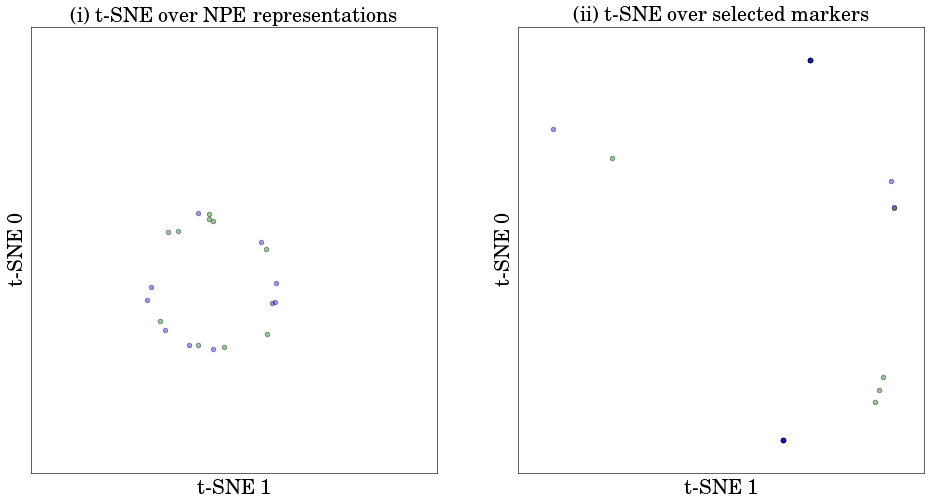

In [25]:
plot_res('../../16S_datasets/results_dental/intermediate_files/npe_representation/periodontal_uniquepiece_-1.npz','../../16S_datasets/results_dental/intermediate_files/npe_representation/periodontal_uniquepiece_-1_features', '../../16S_datasets/results_dental/intermediate_files/npe_marker_files/DvsH_finalmarker_list.txt', '../../16S_datasets/results_dental/intermediate_files/npe_representation/periodontal_uniquepiece_-1_DvsH_Y.txt')



In [12]:
features=FileUtility.load_list()

features_selected=FileUtility.load_list('../../16S_datasets/results_dental/intermediate_files/npe_representation/periodontal_uniquepiece_-1_features')

idx=[features.index(x) for  x in features_selected if x in features]

X_selected=X[:,idx]

[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 20 samples in 0.001s...
[t-SNE] Computed neighbors for 20 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 20 / 20
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 35.3387146, gradient norm = 2.3856561 (50 iterations in 0.016s)
[t-SNE] Iteration 100: error = 34.8167267, gradient norm = 2.5009513 (50 iterations in 0.015s)
[t-SNE] Iteration 150: error = 37.8770599, gradient norm = 1.8479605 (50 iterations in 0.014s)
[t-SNE] Iteration 200: error = 34.6728096, gradient norm = 2.2861168 (50 iterations in 0.014s)
[t-SNE] Iteration 250: error = 37.6816368, gradient norm = 2.1313455 (50 iterations in 0.013s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 37.681637
[t-SNE] Iteration 300: error = 0.0001059, gradient norm = 0.0008119 (50 iterations in 0.014s)
[t-SNE] Iteration 350: error = 0.0000056, gradient norm = 

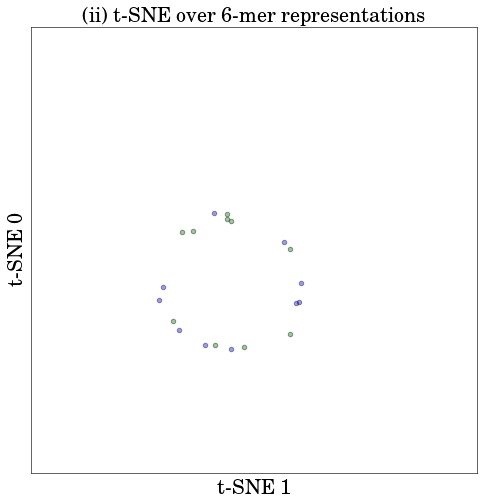

In [11]:
global color_schemes
color_schemes=[['green','blue','red','gold', 'cyan'], ['#ff0505', '#f2a041', '#cdff05', '#04d9cb', '#45a8ff', '#8503a6', '#590202', '#734d02', '#4ab304', '#025359', '#0454cc', '#ff45da', '#993829', '#ffda45', '#1c661c', '#05cdff', '#1c2f66', '#731f57', '#b24a04', '#778003', '#0e3322', '#024566', '#0404d9', '#e5057d', '#66391c', '#31330e', '#3ee697', '#2d7da6', '#20024d', '#33011c']+list(({'aliceblue':            '#F0F8FF','antiquewhite':         '#FAEBD7','aqua':                 '#00FFFF','aquamarine':           '#7FFFD4','azure':                '#F0FFFF','beige':                '#F5F5DC','bisque':               '#FFE4C4','black':                '#000000','blanchedalmond':       '#FFEBCD','blue':                 '#0000FF','blueviolet':           '#8A2BE2','brown':                '#A52A2A','burlywood':            '#DEB887','cadetblue':            '#5F9EA0','chartreuse':           '#7FFF00','chocolate':            '#D2691E','coral':                '#FF7F50','cornflowerblue':       '#6495ED','cornsilk':             '#FFF8DC','crimson':              '#DC143C','cyan':                 '#00FFFF','darkblue':             '#00008B','darkcyan':             '#008B8B','darkgoldenrod':        '#B8860B','darkgray':             '#A9A9A9','darkgreen':            '#006400','darkkhaki':            '#BDB76B','darkmagenta':          '#8B008B','darkolivegreen':       '#556B2F','darkorange':           '#FF8C00','darkorchid':           '#9932CC','darkred':              '#8B0000','darksalmon':           '#E9967A','darkseagreen':         '#8FBC8F','darkslateblue':        '#483D8B','darkslategray':        '#2F4F4F','darkturquoise':        '#00CED1','darkviolet':           '#9400D3','deeppink':             '#FF1493','deepskyblue':          '#00BFFF','dimgray':              '#696969','dodgerblue':           '#1E90FF','firebrick':            '#B22222','floralwhite':          '#FFFAF0','forestgreen':          '#228B22','fuchsia':              '#FF00FF','gainsboro':            '#DCDCDC','ghostwhite':           '#F8F8FF','gold':                 '#FFD700','goldenrod':            '#DAA520','gray':                 '#808080','green':                '#008000','greenyellow':          '#ADFF2F','honeydew':             '#F0FFF0','hotpink':              '#FF69B4','indianred':            '#CD5C5C','indigo':               '#4B0082','ivory':                '#FFFFF0','khaki':                '#F0E68C','lavender':             '#E6E6FA','lavenderblush':        '#FFF0F5','lawngreen':            '#7CFC00','lemonchiffon':         '#FFFACD','lightblue':            '#ADD8E6','lightcoral':           '#F08080','lightcyan':            '#E0FFFF','lightgoldenrodyellow': '#FAFAD2','lightgreen':           '#90EE90','lightgray':            '#D3D3D3','lightpink':            '#FFB6C1','lightsalmon':          '#FFA07A','lightseagreen':        '#20B2AA','lightskyblue':         '#87CEFA','lightslategray':       '#778899','lightsteelblue':       '#B0C4DE','lightyellow':          '#FFFFE0','lime':                 '#00FF00','limegreen':            '#32CD32','linen':                '#FAF0E6','magenta':              '#FF00FF','maroon':               '#800000','mediumaquamarine':     '#66CDAA','mediumblue':           '#0000CD','mediumorchid':         '#BA55D3','mediumpurple':         '#9370DB','mediumseagreen':       '#3CB371','mediumslateblue':      '#7B68EE','mediumspringgreen':    '#00FA9A','mediumturquoise':      '#48D1CC','mediumvioletred':      '#C71585','midnightblue':         '#191970','mintcream':            '#F5FFFA','mistyrose':            '#FFE4E1','moccasin':             '#FFE4B5','navajowhite':          '#FFDEAD','navy':                 '#000080','oldlace':              '#FDF5E6','olive':                '#808000','olivedrab':            '#6B8E23','orange':               '#FFA500','orangered':            '#FF4500','orchid':               '#DA70D6','palegoldenrod':        '#EEE8AA','palegreen':            '#98FB98','paleturquoise':        '#AFEEEE','palevioletred':        '#DB7093','papayawhip':           '#FFEFD5','peachpuff':            '#FFDAB9','peru':                 '#CD853F','pink':                 '#FFC0CB','plum':                 '#DDA0DD','powderblue':           '#B0E0E6','purple':               '#800080','red':                  '#FF0000','rosybrown':            '#BC8F8F','royalblue':            '#4169E1','saddlebrown':          '#8B4513','salmon':               '#FA8072','sandybrown':           '#FAA460','seagreen':             '#2E8B57','seashell':             '#FFF5EE','sienna':               '#A0522D','silver':               '#C0C0C0','skyblue':              '#87CEEB','slateblue':            '#6A5ACD','slategray':            '#708090','snow':                 '#FFFAFA','springgreen':          '#00FF7F','steelblue':            '#4682B4','tan':                  '#D2B48C','teal':                 '#008080','thistle':              '#D8BFD8','tomato':               '#FF6347','turquoise':            '#40E0D0','violet':               '#EE82EE','wheat':                '#F5DEB3','white':                '#FFFFFF','whitesmoke':           '#F5F5F5','yellow':               '#FFFF00','yellowgreen':          '#9ACD32'}).keys()),['#ff0505', '#f2a041', '#cdff05', '#04d9cb', '#45a8ff', '#8503a6', '#590202', '#734d02', '#4ab304', '#025359', '#0454cc', '#ff45da', '#993829', '#ffda45', '#1c661c', '#05cdff', '#1c2f66', '#731f57', '#b24a04', '#778003', '#0e3322', '#024566', '#0404d9', '#e5057d', '#66391c', '#31330e', '#3ee697', '#2d7da6', '#20024d', '#33011c']]
X_new=get_tsne(X)
myplot=figure(figsize=(6, 8))
ax=subplot(121)
plot_scatter(ax, X_new, Y, 't-SNE 1', 't-SNE 0', '(ii) t-SNE over 6-mer representations',legend_hide=False,  legend_loc=9,  legend_size=10,label_dict=None, color_schemes_idx=0)
